# DIABETES PREDICTION FROM LAB AND PHYSICAL EXAMINATION DATA

In [35]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from feature_selector import FeatureSelector

In [2]:
diabdb = pd.read_csv('diabetes.csv')
diabdb.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

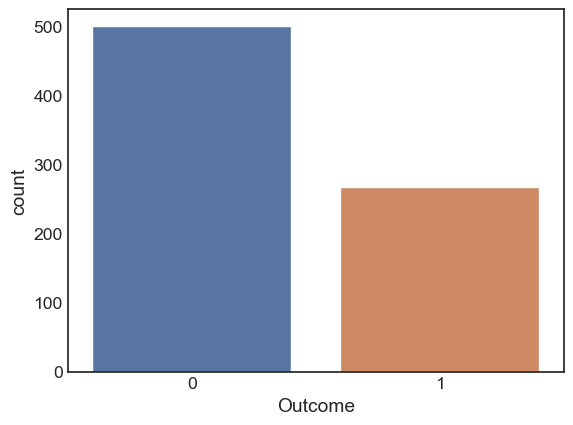

In [44]:
sns.countplot(diabdb['Outcome'],label="Count")

In [27]:
print("DIMENSIONS OF THE DATA : {}".format(diabdb.shape))
diabdb.head(10)

DIMENSIONS OF THE DATA : (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## Controlling The Data Cleaning Of Missing or Null Data points

In [4]:
diabdb.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
diabdb.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### NUMBER OF OUTLIERS WITH RESPECT TO FEATURES

In [6]:
print("Total BloodPressure: ", diabdb[diabdb.BloodPressure == 0].shape[0])
print(diabdb[diabdb.BloodPressure == 0].groupby('Outcome')['Age'].count())
print("Total Glucose: ", diabdb[diabdb.Glucose == 0].shape[0])
print(diabdb[diabdb.Glucose == 0].groupby('Outcome')['Age'].count())
print("Total SkinThickness: ", diabdb[diabdb.SkinThickness == 0].shape[0])
print(diabdb[diabdb.SkinThickness == 0].groupby('Outcome')['Age'].count())
print("Total BMI: ", diabdb[diabdb.BMI == 0].shape[0])
print(diabdb[diabdb.BMI == 0].groupby('Outcome')['Age'].count())
print("Total Insulin: ", diabdb[diabdb.Insulin == 0].shape[0])
print(diabdb[diabdb.Insulin == 0].groupby('Outcome')['Age'].count())

Total BloodPressure:  35
Outcome
0    19
1    16
Name: Age, dtype: int64
Total Glucose:  5
Outcome
0    3
1    2
Name: Age, dtype: int64
Total SkinThickness:  227
Outcome
0    139
1     88
Name: Age, dtype: int64
Total BMI:  11
Outcome
0    9
1    2
Name: Age, dtype: int64
Total Insulin:  374
Outcome
0    236
1    138
Name: Age, dtype: int64


In [9]:
diabetes_mod = diabdb[(diabdb.BloodPressure != 0) & (diabdb.BMI != 0) & (diabdb.Glucose != 0)]
print(diabdb.shape)

(768, 9)


### CORRELATION MAP

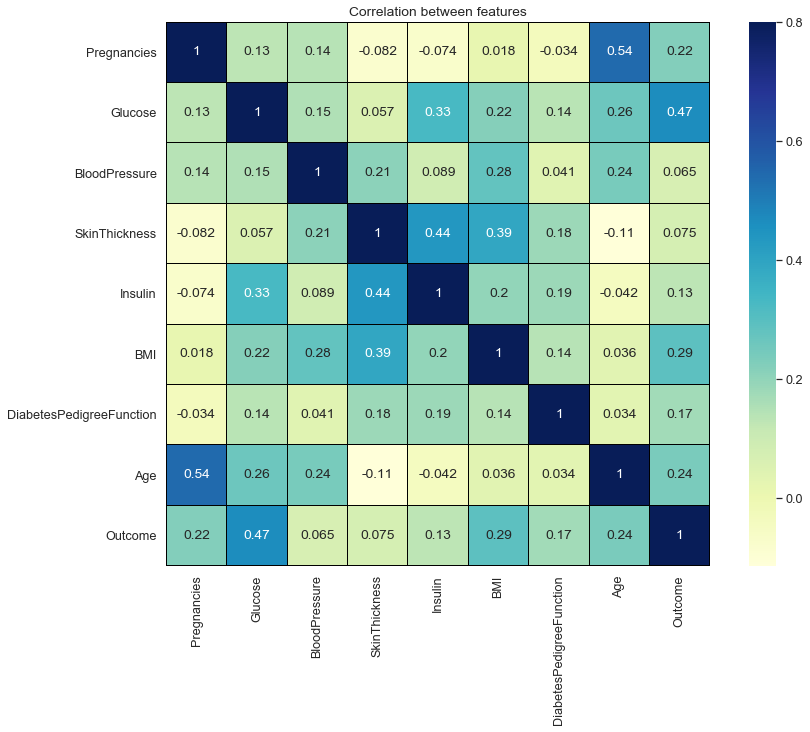

In [28]:
corr=diabdb.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features');

In [46]:
#sns.heatmap(corr,annot=True)

In [29]:
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [11]:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes_mod[feature_names]
y = diabetes_mod.Outcome

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.856908	valid_0's binary_logloss: 0.471384
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.861184	valid_0's binary_logloss: 0.531809
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[14]	valid_0's auc: 0.85477	valid_0's binary_logloss: 0.507338
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.832895	valid_0's binary_logloss: 0.57101
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.817434	valid_0's binary_logloss: 0.497312
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[13]	valid_0's auc: 0.8625	valid_0's binary_logloss: 0.511337
Train

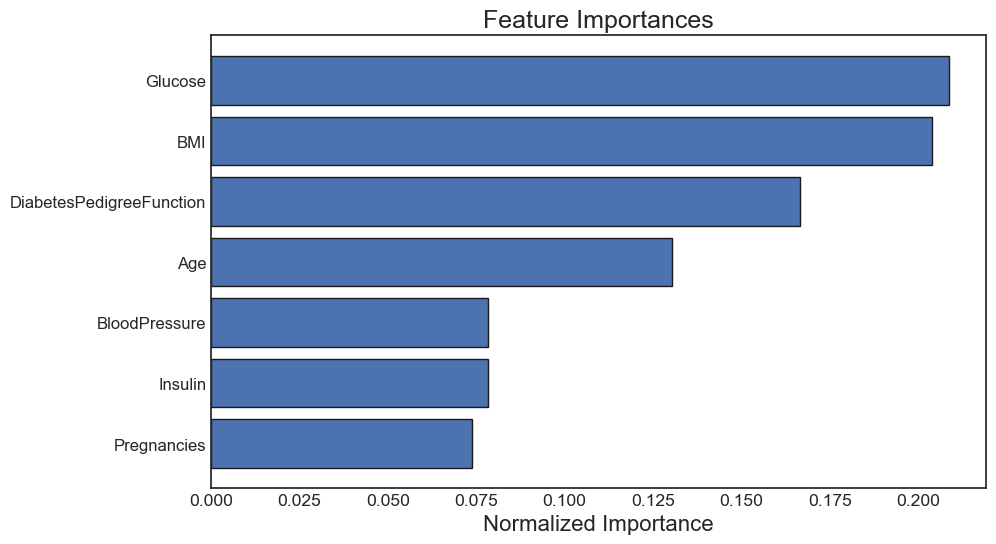

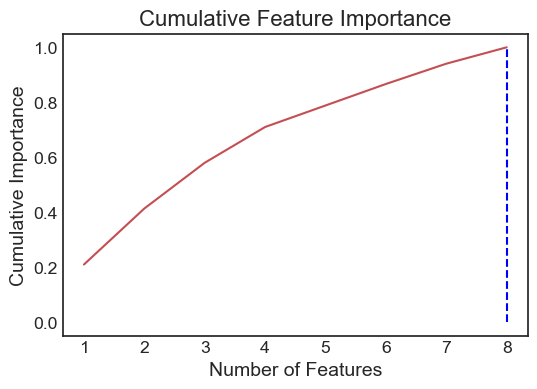

8 features required for 0.99 of cumulative importance


In [43]:
train_labels = diabdb['Outcome']
train_labels
train = diabdb.drop(columns = ['Outcome'])
fs = FeatureSelector(data = train, labels = train_labels)
fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = True)
zero_importance_features = fs.ops['zero_importance']
zero_importance_features[10:15]
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

## Models

In [12]:
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC(gamma='scale')))
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=4000)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('GB', GradientBoostingClassifier()))

In [20]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = diabetes_mod.Outcome, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [21]:
names = []
scores = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.710345
1  SVC  0.765517
2   LR  0.786207
3   DT  0.710345
4  GNB  0.731034
5   RF  0.751724
6   GB  0.751724


### Cross Validation

In [48]:
strat_k_fold = StratifiedKFold(n_splits=10)

names = []
scores = []

for name, model in models:
    
    score = cross_val_score(model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.714136
1  SVC  0.755651
2   LR  0.772165
3   DT  0.699239
4  GNB  0.754205
5   RF  0.764003
6   GB  0.762538


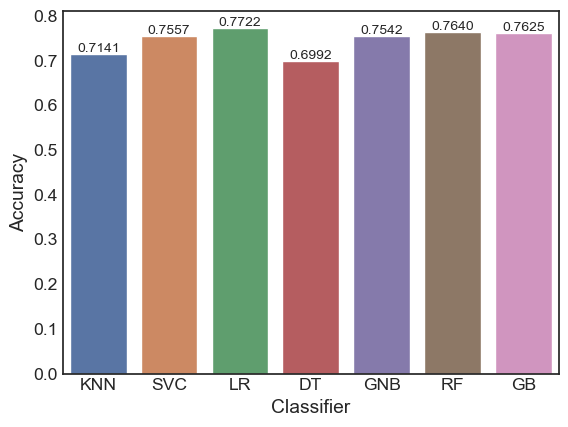

In [49]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

## Cross Validation Of Feature Selection 

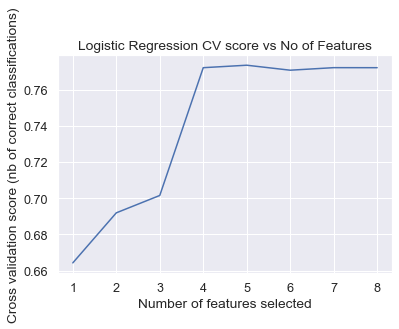

In [24]:
from sklearn.feature_selection import RFECV
logreg_model = LogisticRegression(solver='lbfgs', max_iter=4000)

rfecv = RFECV(estimator=logreg_model, step=1, cv=strat_k_fold, scoring='accuracy')
rfecv.fit(X, y)

plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [25]:
feature_importance = list(zip(feature_names, rfecv.support_))

new_features = []

for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [26]:
X_new = diabetes_mod[new_features]

initial_score = cross_val_score(logreg_model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
print("Initial accuracy : {} ".format(initial_score))

fe_score = cross_val_score(logreg_model, X_new, y, cv=strat_k_fold, scoring='accuracy').mean()
print("Accuracy after Feature Selection : {} ".format(fe_score))

Initial accuracy : 0.7721651445966514 
Accuracy after Feature Selection : 0.77353500761035 
